In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y = [], []
    for i in range(len(data)-step):
        d = i + step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [3]:
t = np.arange(0, 1500)
X = np.sin(0.02 * t) + np.random.rand(1500)

X_train, Y_train = convertToDataset(X[0:1000], step=10)
X_test, Y_test = convertToDataset(X[1000:], step=20)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

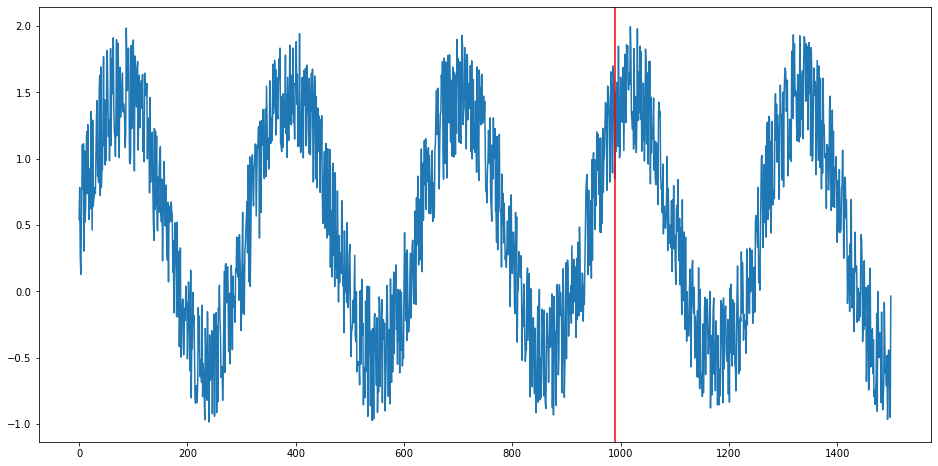

In [4]:
plt.figure(figsize=(16, 8))
plt.plot(X)
plt.axvline(len(X_train), c="r")
plt.show()

In [5]:
print(X_train.shape)
print(X_test.shape)

(990, 10, 1)
(480, 20, 1)


In [6]:
model = Sequential([
    SimpleRNN(units=64, input_shape=(None, 1),  activation="tanh"),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.MSE)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.input

<KerasTensor: shape=(None, None, 1) dtype=float32 (created by layer 'simple_rnn_input')>

In [ ]:
model.fit(X_train, Y_train, batch_size=16, epochs=100)

In [10]:
model.evaluate(X_train, Y_train)

31/31 [==============================] - 0s 556us/step - loss: 0.0838


0.08381546288728714

In [11]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
predicted = np.concatenate((trainPredict, testPredict), axis=0)

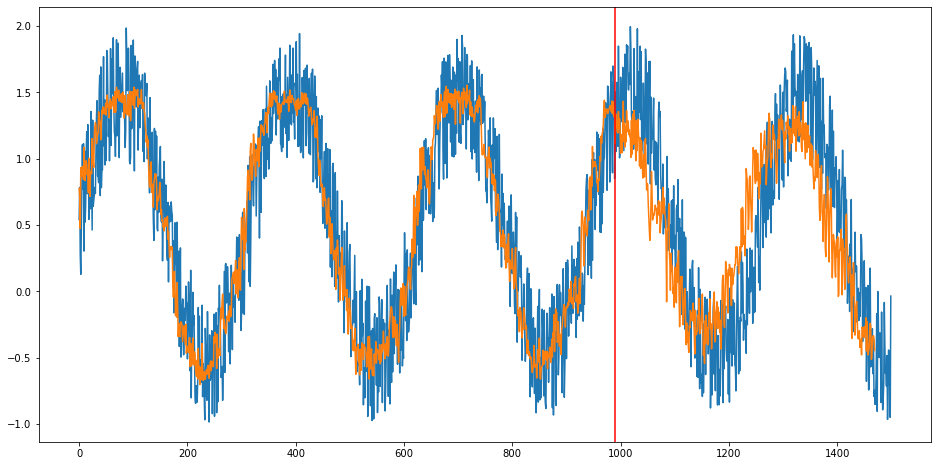

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(X)
plt.plot(predicted)
plt.axvline(len(X_train), c="r")
plt.show()